<a href="https://colab.research.google.com/github/TomKeeble/beanify/blob/master/tensorflow_beanify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import os

import numpy

# from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

DIR = '/content/drive/My Drive/training_data'
BEAN_BORDER_MULT = 0.2

x = []
y = []

def read_frame(frame_path):
    return cv2.imread(frame_path)

def convert_color_space(image, flag=cv2.COLOR_BGR2RGB):
    return cv2.cvtColor(image, flag)

def perform_pre_processing(frame):
    hsv = convert_color_space(frame, flag=cv2.COLOR_BGR2HSV)
    hue, saturation, value = cv2.split(hsv)
    retval, thresholded = cv2.threshold(saturation, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    medianFiltered = cv2.medianBlur(thresholded,5)
    _, contours, hierarchy = cv2.findContours(medianFiltered, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours, frame

def find_center(contour):
    M = cv2.moments(contour)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    return cX, cY


def analyze_frame(path, area_thr=4000):
    contours, frame = perform_pre_processing(path)
    object_map = {}
    id_num = 0
    contour_list = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > area_thr:
            cX, cY = find_center(contour)
            x, y, w, h = cv2.boundingRect(contour)
            pad = round(BEAN_BORDER_MULT * (h if h > w else w) * 2)
            x -= int(pad / 2)
            y -= int(pad / 2)
            w += pad
            h += pad
            # draw_rect(frame, x, y, w, h)
            # 1080-y+h
            return frame[y:y+(h if h < w else w), x:x+(h if h < w else w)]
            # draw_black_rect(frame, 0, 0, frame.shape[1]-1, frame.shape[0]-1)
            # contour_list.append(contour)
            # object_map[id_num] = [x, y, w, h, cX, cY]
            # id_num = id_num + 1


    return object_map


def read_vid(path):
    vid = cv2.VideoCapture(path)

    frames = []

    while (vid.isOpened()):
    # Capture frame-by-frame
        ret, frame = vid.read()
        if ret == True:

        # Display the resulting frame
        #     cv2.imshow('Frame', frame)
            #scale_percent = 25  # percent of original size
            #width = int(frame.shape[1] * scale_percent / 100)
            #height = int(frame.shape[0] * scale_percent / 100)
            dim = (100, 100)
            try:
              resized = cv2.resize(analyze_frame(frame), dim, interpolation=cv2.INTER_AREA)
            except:
              resized=None
            # cv2.imshow('Frame', resized)
            frames.append(resized)

        # Press Q on keyboard to  exit
            if cv2.waitKey(25) & 0xFF == ord('q'):
                break

    # Break the loop
        else:
            break

    return frames

dir_map = {}

xt = []
yt = []

missing_beans = 0  

ix = 0
for i, f in enumerate(os.listdir(DIR)):
    if f[:-4].split('_')[0] in dir_map.keys():
        i = dir_map[f[:-4].split('_')[0]]
    else:
        dir_map[f[:-4].split('_')[0]] = ix
        i=ix
        ix+=1
    #if len(x) != 0:
    #  break
    relpath = os.path.join(DIR, f)
    print(relpath, end=' ')
    frames = read_vid(relpath)
    print(len(frames))
    #frames=['a','b']

    for frame in frames:
        if frame is not None:
            if f[-5] != '2':
                x.append(numpy.asarray(frame))
                y.append(i)
            else:
                xt.append(numpy.asarray(frame))
                yt.append(i)
        else:
          missing_beans += 1

print(str(missing_beans) + ' missing beans')
print(dir_map)





/content/drive/My Drive/training_data/CARAMEL_2.mov 496
/content/drive/My Drive/training_data/LIQUORICE_2.mov 494
/content/drive/My Drive/training_data/TROPICALPUNCH_2.mov 326
/content/drive/My Drive/training_data/CRANBERRYANDAPPLE_2.mov 342
/content/drive/My Drive/training_data/CHILLI.MOV 309
/content/drive/My Drive/training_data/GRAPE_2.mov 342
/content/drive/My Drive/training_data/CHILLI_1.mov 334
/content/drive/My Drive/training_data/BUTTERSCOTCH_2.mov 401
/content/drive/My Drive/training_data/CHILLI_2.mov 374
/content/drive/My Drive/training_data/BANNANASPLIT_2.mov 430
/content/drive/My Drive/training_data/WILDCHERRY_2.mov 390
/content/drive/My Drive/training_data/CANDYFLOSS_2.mov 440
/content/drive/My Drive/training_data/PINKGRAPEFRUIT_2.mov 404
/content/drive/My Drive/training_data/PINACOLADA_2.mov 327
/content/drive/My Drive/training_data/WATERMELON_2.mov 409
/content/drive/My Drive/training_data/TANGERINE_2.mov 333
/content/drive/My Drive/training_data/STRAWBERRYSMOOTHIE_2.mov

In [0]:
len(yt)

10070

In [0]:
len(x)

10857

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: <URL>

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!du -h *
!ls -la videos/

55M	sample_data
525M	videos
total 537520
drwxr-xr-x 2 root root     4096 Nov 17 09:02 .
drwxr-xr-x 1 root root     4096 Nov 17 08:55 ..
-rw-r--r-- 1 root root  4167675 Nov 17 08:57 BANANASPLIT_1.mov
-rw-r--r-- 1 root root 11465425 Nov 17 08:58 BANANASPLIT.MOV
-rw-r--r-- 1 root root  5077410 Nov 17 08:57 BANNANASPLIT_2.mov
-rw-r--r-- 1 root root  3766717 Nov 17 08:57 BLUEBERRYPIE_1.mov
-rw-r--r-- 1 root root  4285451 Nov 17 08:57 BLUEBERRYPIE_2.mov
-rw-r--r-- 1 root root 10614690 Nov 17 08:57 BLUEBERRYPIE.MOV
-rw-r--r-- 1 root root  3816541 Nov 17 09:01 BUTTERSCOTCH_1.mov
-rw-r--r-- 1 root root  4722872 Nov 17 08:57 BUTTERSCOTCH_2.mov
-rw-r--r-- 1 root root 10148909 Nov 17 08:57 BUTTERSCOTCH.MOV
-rw-r--r-- 1 root root  3751302 Nov 17 08:57 CANDYFLOSS_1.mov
-rw-r--r-- 1 root root  5160917 Nov 17 08:57 CANDYFLOSS_2.mov
-rw-r--r-- 1 root root 10664137 Nov 17 08:57 CANDYFLOSS.MOV
-rw-r--r-- 1 root root  3866521 Nov 17 08:57 CARAMEL_1.mov
-rw-r--r-- 1 root root  5805338 Nov 17 08:57 CARAMEL_

In [0]:
cv2.imwrite('samples/img.jpg', xt[3857])
yt[3857]


11

In [0]:
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import SpatialDropout2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import random

aug = ImageDataGenerator(
		rotation_range=20,
		zoom_range=0.15,
		width_shift_range=0.2,
		height_shift_range=0.2,
		shear_range=0.15,
		horizontal_flip=True,
		fill_mode="nearest")

indicies = list(range(len(x)))
random.shuffle(indicies)

x1 = [x[n] for n in indicies]
y1 = [y[n] for n in indicies]

#(trainX, testX, trainY, testY) = train_test_split(data, labels,
#	test_size=0.25, stratify=labels, random_state=42)

x_train = numpy.asarray(x1)
#y_train = numpy.asarray(y[32::4])
y_train = y1

x_test = numpy.asarray(xt)
#y_test = numpy.asarray(y[0::4])
y_test = yt


batch_size = 128
num_classes = 31
epochs = 12

# input image dimensions
# img_rows, img_cols = 28, 28

# the data, split between train and test sets
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

img_rows = x_train.shape[2]
img_cols = x_train.shape[1]


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
    chanDim=1
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)
    chanDim=-1

# input_shape = x_train.shape

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,
                 padding="same"))
model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(SpatialDropout2D(0.3))

# (CONV => RELU) * 2 => POOL
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

#model.add(Conv2D(32, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(0.00008),
              metrics=['accuracy'])

model.fit_generator(aug.flow(x_train, y_train, batch_size=batch_size),
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          steps_per_epoch=(len(x_train)/batch_size)*3,
          shuffle=True)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save('model_out')

predictions = model.predict(x_test, batch_size=batch_size)
print(classification_report(y_test.argmax(axis=1),
                            predictions.argmax(axis=1), target_names=dir_map.keys()))
print(confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1)))

x_train shape: (10857, 100, 100, 3)
10857 train samples
10070 test samples
Epoch 1/12
255/254 [==============================] - 73s 288ms/step - loss: 1.8951 - acc: 0.4584 - val_loss: 3.4553 - val_acc: 0.3870
Epoch 2/12
255/254 [==============================] - 70s 273ms/step - loss: 0.4364 - acc: 0.8512 - val_loss: 2.9136 - val_acc: 0.5556
Epoch 3/12
255/254 [==============================] - 69s 272ms/step - loss: 0.2160 - acc: 0.9275 - val_loss: 2.6726 - val_acc: 0.6835
Epoch 4/12
255/254 [==============================] - 70s 273ms/step - loss: 0.1450 - acc: 0.9533 - val_loss: 2.9402 - val_acc: 0.6204
Epoch 5/12
255/254 [==============================] - 69s 272ms/step - loss: 0.1048 - acc: 0.9665 - val_loss: 2.8608 - val_acc: 0.6575
Epoch 6/12
255/254 [==============================] - 70s 274ms/step - loss: 0.0790 - acc: 0.9743 - val_loss: 3.1463 - val_acc: 0.6657
Epoch 7/12
255/254 [==============================] - 69s 270ms/step - loss: 0.0627 - acc: 0.9802 - val_loss: 3.187

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


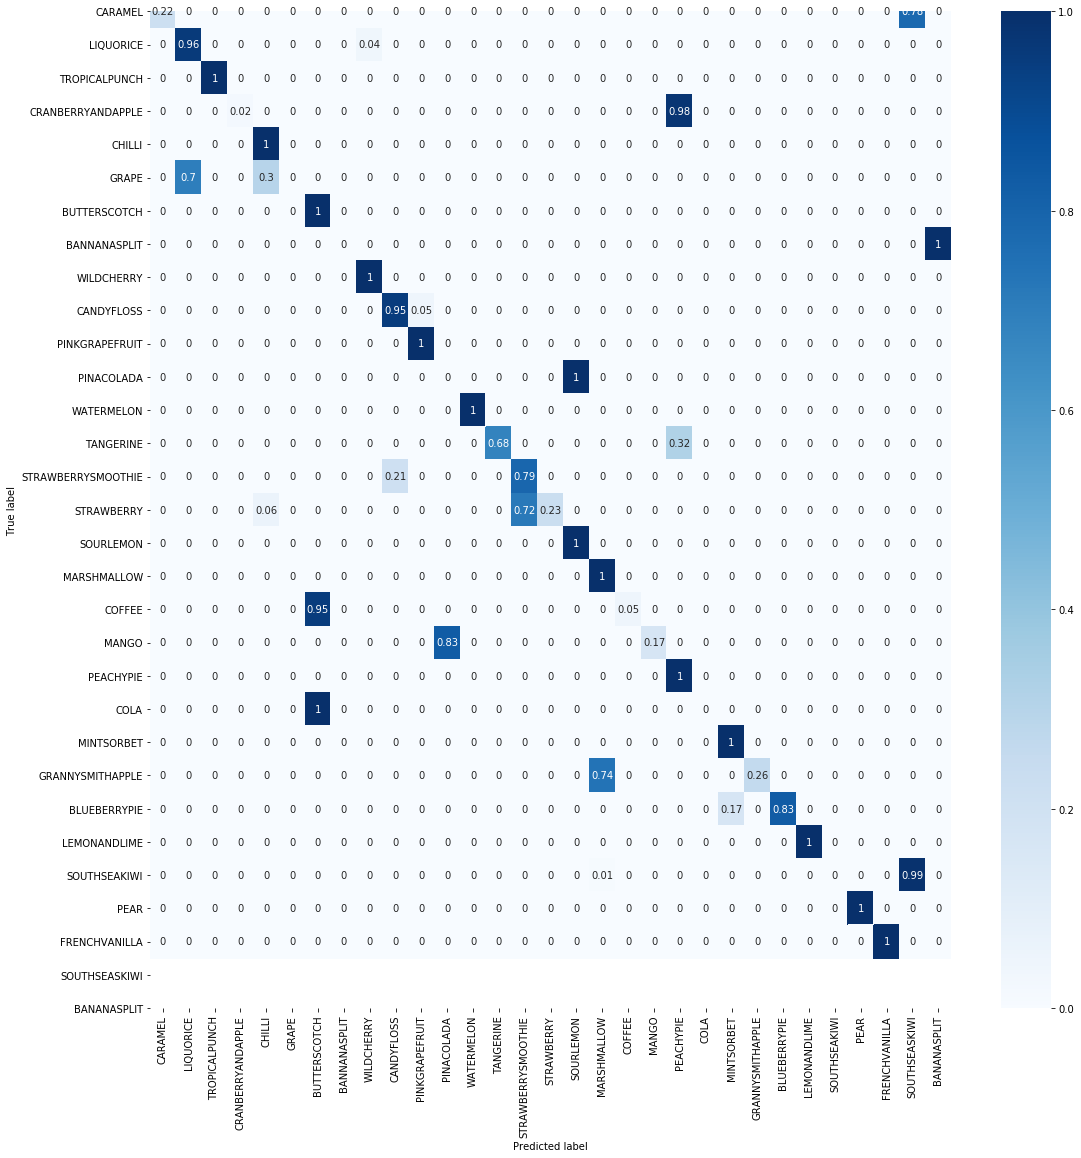

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

mat = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
mat = np.around(mat.astype('float') / mat.sum(axis=1)[:, np.newaxis], decimals=2)


figure = plt.figure(figsize=(16, 16))
sns.heatmap(mat, annot=True,cmap=plt.cm.Blues,xticklabels=dir_map.keys(), yticklabels=dir_map.keys())
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# New Section

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a file.
uploaded = drive.CreateFile({'title': 'model_out'})
uploaded.SetContentFile('model_out')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1CcDzoQWj8kyA2eOhmqJ0fyqTn1xplukj
